# Stock Price Prediction.

This notebook will walk you through the process of predicting stock prices using historical market data. We'll focus on a single company's stock (Apple Inc. - AAPL) and apply data preprocessing, exploratory analysis, and machine learning techniques to forecast future stock prices.

**Objectives:**
* Load and clean historical stock data
* Perform exploratory data analysis (EDA)
* Engineer useful features

Train and evaluate predictive models (e.g., Linear Regression, LSTM, etc.)

**Visualize the predictions vs. actual performance**

*⚠️ Note: This is a simplified example for educational purposes. Real-world stock prediction is highly complex and influenced by numerous external factors not considered here.*

In [1]:
!pip install yfinance -q

## Import all the Necessary libraries

In [2]:
# General purpose packages.
import os
from datetime import datetime

# Application level packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

## Data Collection.

The data is collected using the Python package yfinance, which allows easy access to historical market data from Yahoo Finance. In this notebook, we focus on the stock of Apple Inc. with the ticker symbol AAPL.

In [3]:
# Set the start date
# 10 years before today
now = datetime.now()
start = datetime(now.year-10, now.month, now.day)

# Stock data for Apple.
ticker = "AAPL"
stock_df = yf.download(ticker, start=start, end=now)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
stock_df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-06-08,28.622967,28.938761,28.405719,28.869328,210699200
2015-06-09,28.537851,28.685670,28.134712,28.376595,224301600
2015-06-10,28.864845,28.967868,28.634158,28.649836,156349200
2015-06-11,28.799896,29.156003,28.775260,28.932036,141563600
2015-06-12,28.481867,28.741669,28.468429,28.710314,147544800


In [5]:
# Reset the index (Date is the
# by default index.)
stock_df = stock_df.reset_index()

In [6]:
stock_df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-06-08,28.622967,28.938761,28.405719,28.869328,210699200
1,2015-06-09,28.537851,28.685670,28.134712,28.376595,224301600
2,2015-06-10,28.864845,28.967868,28.634158,28.649836,156349200
3,2015-06-11,28.799896,29.156003,28.775260,28.932036,141563600
4,2015-06-12,28.481867,28.741669,28.468429,28.710314,147544800


In [7]:
# Flatten the MultiIndex columns
stock_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in stock_df.columns]

# View the updated DataFrame
print(stock_df.head())

        Date  Close_AAPL  High_AAPL   Low_AAPL  Open_AAPL  Volume_AAPL
0 2015-06-08   28.622967  28.938761  28.405719  28.869328    210699200
1 2015-06-09   28.537851  28.685670  28.134712  28.376595    224301600
2 2015-06-10   28.864845  28.967868  28.634158  28.649836    156349200
3 2015-06-11   28.799896  29.156003  28.775260  28.932036    141563600
4 2015-06-12   28.481867  28.741669  28.468429  28.710314    147544800


## FeatureEngineerig.

In this project, we keep the modeling process simple and focused by using only the closing price of the stock as the input feature for prediction.

However, to aid in exploratory analysis and visualization, we engineered additional features such as:

* 100-Day Moving Average (MA_100)

* Percentage Change (Pct_Change)

These features help us understand the long-term trend and volatility of the stock, but they are not used as inputs for the prediction model.

### 100 Days moving average.

The 100-day moving average is a commonly used technical indicator that smooths out short-term price fluctuations to help reveal the underlying trend of the stock over a longer period.

It is calculated by taking the average of the closing prices over the past 100 days for each point in time.

Although this feature is not used as an input to the model, it is useful for exploratory data analysis and visualization to understand long-term stock trends.


In [8]:
stock_df.loc[:, "MA_100"] = stock_df['Close_AAPL'].rolling(100).mean()

### 200 Days Moving Average.

The 200-day moving average is a commonly used technical indicator that smooths out short-term price fluctuations to help reveal the underlying trend of the stock over a longer period.

It is calculated by taking the average of the closing prices over the past 200 days for each point in time.

Although this feature is not used as an input to the model, it is useful for exploratory data analysis and visualization to understand long-term stock trends.

In [9]:
stock_df.loc[:, "MA_200"] = stock_df['Close_AAPL'].rolling(200).mean()

### Visualization.

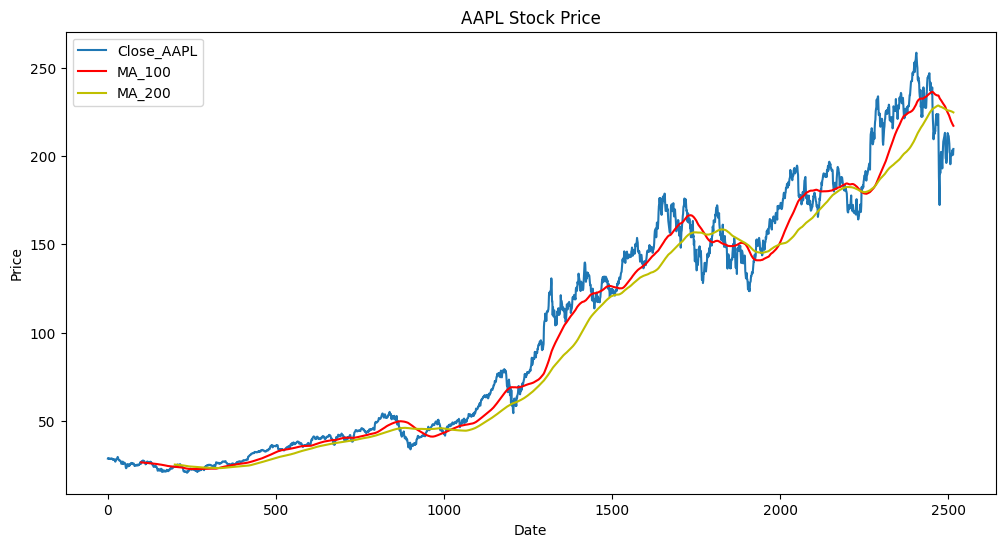

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(stock_df['Close_AAPL'])
plt.plot(stock_df['MA_100'], 'r')
plt.plot(stock_df['MA_200'], 'y')
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Close_AAPL', 'MA_100', 'MA_200'])
plt.show()

### Percentage Change.
The percentage change measures how much the closing price changes from one day to the next, expressed as a percentage. It gives insight into the daily volatility and momentum of the stock.

Although this feature is not used as input for model training, it is helpful for understanding how frequently and by how much the stock price fluctuates.


In [11]:
stock_df['PCT_Change'] = stock_df['Close_AAPL'].pct_change()

## Data Preprocessing.

The closing price data is preprocessed using MinMaxScaler from sklearn.preprocessing to scale the values between 0 and 1. This is a crucial step for training neural networks like LSTMs, which are sensitive to the scale of input features.

Since we are only using the closing price, the scaler is applied to the **'Close'** column.

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [13]:
# Splitting data into Training & Testing datasets
data_training = pd.DataFrame(stock_df.Close_AAPL[0:int(len(stock_df)*0.7)])
data_testing = pd.DataFrame(stock_df.Close_AAPL[int(len(stock_df)*0.7): int(len(stock_df))])

print(data_training)
print(data_testing)

# Scale the training data using minmax scaler.
data_training_array = scaler.fit_transform(data_training)
data_training_array

      Close_AAPL
0      28.622967
1      28.537851
2      28.864845
3      28.799896
4      28.481867
...          ...
1756  141.509689
1757  147.277191
1758  146.489822
1759  146.361908
1760  148.822388

[1761 rows x 1 columns]
      Close_AAPL
1761  143.084473
1762  143.832458
1763  146.361908
1764  145.623703
1765  140.387726
...          ...
2511  201.699997
2512  203.270004
2513  202.820007
2514  200.630005
2515  203.919998

[755 rows x 1 columns]


array([[0.05047853],
       [0.04993982],
       [0.05200942],
       ...,
       [0.79647973],
       [0.79567014],
       [0.81124297]])

## Sequence Creation.

The stock price dataset is transformed into sequences of length 100 to capture temporal dependencies. This is a common approach when working with time series data, especially for models like RNNs and LSTMs that rely on sequential input.

Each input sample consists of 100 consecutive time steps (e.g., the closing prices or multiple features), and the corresponding target is the stock price at the next time step (i.e., time step 101). This way, the model learns to predict the future price based on the previous 100 days of data.

In [14]:
x_train = []
y_train = []

# Create sequences of length 100 for training.
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

# Convert to numpy.ndarray for faster computation.
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train.shape, y_train.shape

((1661, 100, 1), (1661,))

## Model building.

We will be using a Recurrent Neural Network (RNN), specifically the Long Short-Term Memory (LSTM) architecture, to predict future stock prices based on historical data.

LSTMs are well-suited for time series prediction because they can learn long-term dependencies and patterns in sequential data—such as trends in stock price movements over time.

### LSTM?
* Captures temporal dependencies in time series

* Mitigates the vanishing gradient problem common in traditional RNNs

* Widely used for financial and sequential data tasks

**Model Overview:**
Input shape: Sequences of length 100 (e.g., past 100 days)

Architecture:

* LSTM layer(s)

* Dense layer(s)

* Output layer predicting the next stock price

* Loss function: Mean Squared Error (MSE)

* Optimizer: Adam

In [16]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [17]:
# ML Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

In [18]:
# Create a sequential model.
model = Sequential()

# Add the LSTM and Dense layers.
model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

## Model Training.

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0266
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.3527e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.1834e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.2197e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.2126e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.3046e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.3003e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.3718e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.0761e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.7398e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.0462e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.3502e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.3454e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.0651e-04
Epoch 15/50
52/52 ━

In [20]:
# Save the trained model
model.save('stock_prediction_model.keras')

## Preparing Test data.

In [21]:
# Extract the data from the last 100
# entries from the trainset.
past_100_days = data_training.tail(100)

# Add the past 100 entries to the test dataset
# and perorm model evaluation.
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

# Scale the data using MinMaxScaler
# trained on the train data.
input_data = scaler.fit_transform(final_df)

In [22]:
x_test = []
y_test = []

# Create sequences of data for model.
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

# Convert it to np.ndarray for faster computation.
x_test, y_test = np.array(x_test), np.array(y_test)

In [23]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [24]:
# Inverse transform the predicted values for model evaluation.
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

### Visualize the Results.

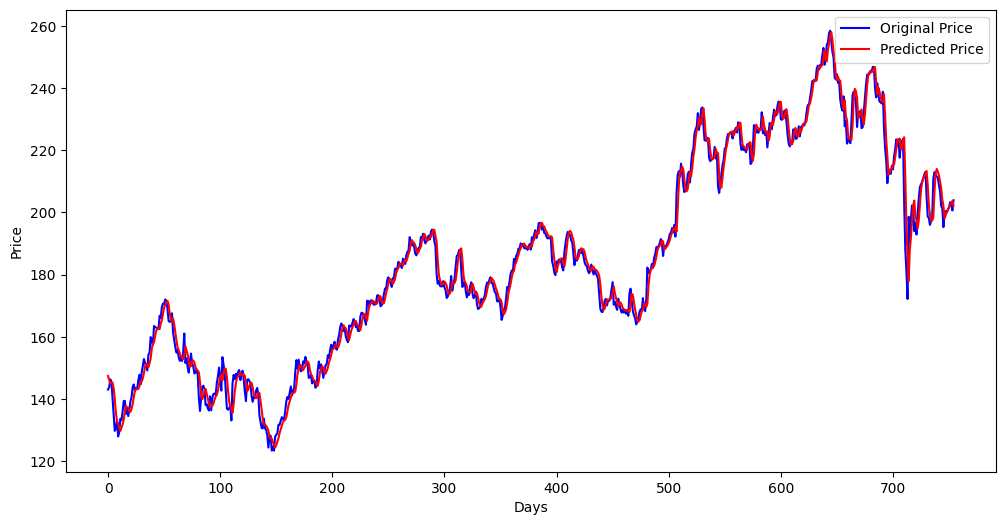

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(140.0, 220.0)

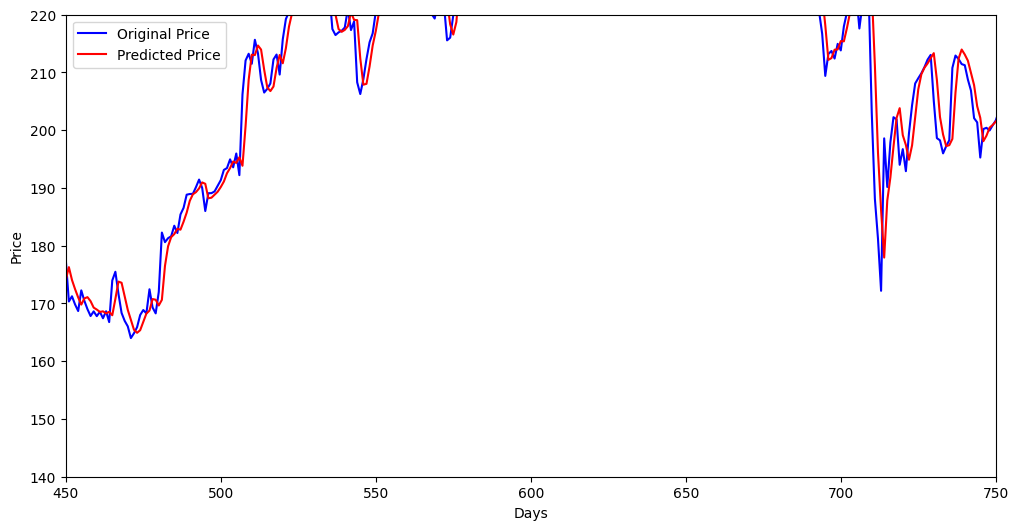

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)

## Model Evaluation.

In [27]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 13.642056656308357


In [29]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.693515487487274


In [30]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9869856712494617
